<a href="https://colab.research.google.com/github/aminekhasteh/DeepLearningFinalReport2020/blob/master/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import fastai

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
bs = 64

In [ ]:
image_path_fastai = Path('/content/drive/My Drive/Colab Notebooks/Breast Cancer/images')

In [ ]:
classes = [f for f in os.listdir(image_path_fastai) if os.path.isdir(os.path.join(image_path_fastai, f))]
classes = classes[1:]

In [ ]:
for c in classes:
    print(c)
    verify_images(image_path_fastai/c, delete=True, max_size=256)

Stage IIB


Stage IIA


Stage IIIA


Stage IIIC


Stage IA


Stage I


Stage II


models


In [ ]:
# This function transforms the imaging data. 
# The first one uses the original data and the second one flips and zooms in the images.
#tfms = None
#tfms = get_transforms(do_flip=True, flip_vert = False, max_zoom=1.5)

In [ ]:
np.random.seed(6869)
data = ImageDataBunch.from_folder(image_path_fastai, train=".", valid_pct=0.2,
         size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['Stage I',
 'Stage IA',
 'Stage II',
 'Stage IIA',
 'Stage IIB',
 'Stage IIIA',
 'Stage IIIC']

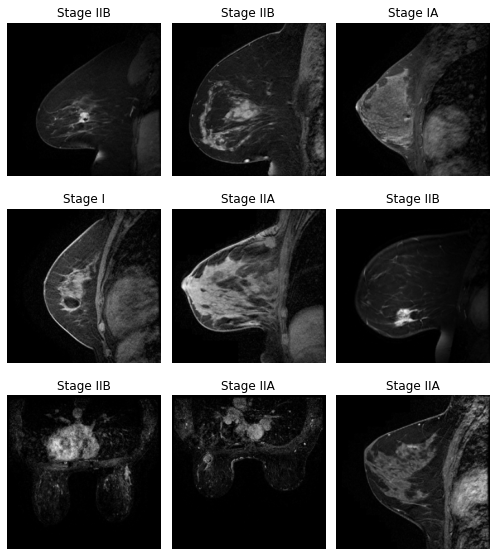

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Stage I',
  'Stage IA',
  'Stage II',
  'Stage IIA',
  'Stage IIB',
  'Stage IIIA',
  'Stage IIIC'],
 7,
 597,
 149)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.971838,3.786174,0.939597,00:05
1,2.349278,2.996491,0.778524,00:05
2,1.758763,2.679873,0.550336,00:05
3,1.298015,2.511346,0.523490,00:05
4,0.988017,1.870806,0.429530,00:05
5,0.767088,1.036786,0.315436,00:05
6,0.607640,0.530740,0.161074,00:05
7,0.497831,0.364065,0.107383,00:05
8,0.409295,0.309088,0.087248,00:05
9,0.340308,0.298192,0.087248,00:05


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(7e-5,7e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.071624,0.587486,0.161074,00:05
1,0.162357,0.927670,0.255034,00:05
2,0.187952,0.808395,0.208054,00:05
3,0.154362,0.209748,0.046980,00:05
4,0.122152,0.195703,0.046980,00:05


In [ ]:
learn.save('stage-2')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

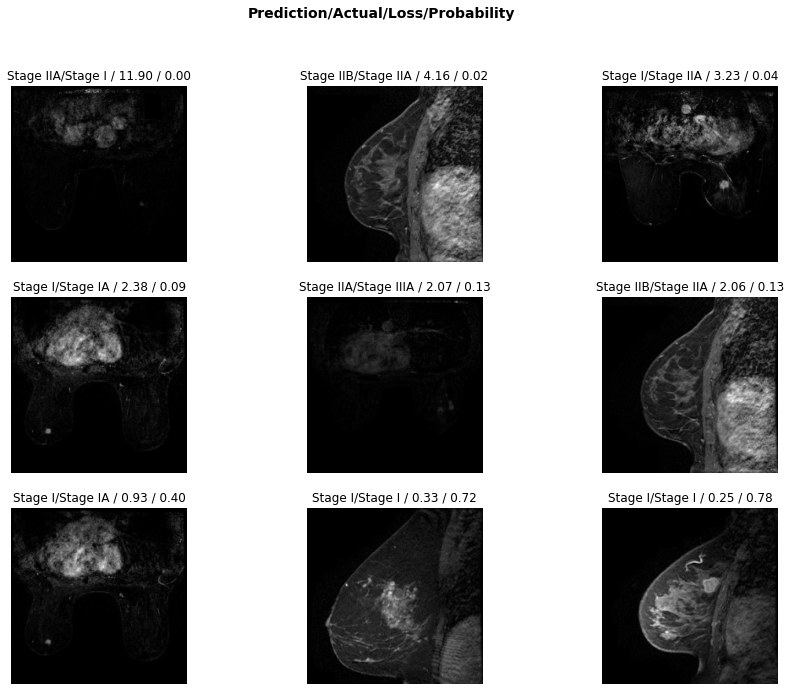

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

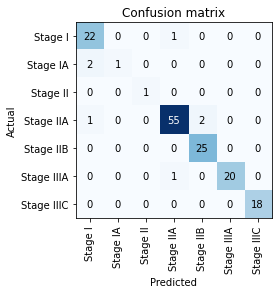

In [ ]:
interp.plot_confusion_matrix()